In [94]:
import tensorflow as tf

from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt

In [95]:
data = pd.read_excel('C:/Users/jcoliveira/Desktop/TCC/Projeto/DataBase.xlsx')

In [96]:
y = data.Resultado
x = data.drop(columns = ['Resultado'])

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# Normalização dos dados
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((24878, 22), (10662, 22), (24878,), (10662,))

In [98]:
#model = Sequential()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(x_train.shape[1],), activation='relu'), # Definindo camada de entrada como o numero de atributos
    tf.keras.layers.Dense(32, activation='relu'),                                  # Definindo camada oculta com 32 neurônios (relu)
    tf.keras.layers.Dense(32, activation='relu'),                                  # Definindo camada oculta com 32 neurônios (relu)
    tf.keras.layers.Dense(1, activation='sigmoid')                                 # Definindo camada de saída para classificação binária (sigmoid)
])

C:\Users\Apolo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [99]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy']) # Optmizer Adam, SGD e RMSprop

In [100]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.3) 
# Quantas vezes o modelo verá os dados; Número de amostras por iteração de atualização de pesos

Epoch 1/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5214 - loss: 0.6940 - val_accuracy: 0.5414 - val_loss: 0.6909
Epoch 2/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.5563 - loss: 0.6870 - val_accuracy: 0.5616 - val_loss: 0.6852
Epoch 3/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.5610 - loss: 0.6825 - val_accuracy: 0.5679 - val_loss: 0.6792
Epoch 4/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.5758 - loss: 0.6750 - val_accuracy: 0.5766 - val_loss: 0.6733
Epoch 5/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.5773 - loss: 0.6700 - val_accuracy: 0.5857 - val_loss: 0.6680
Epoch 6/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5869 - loss: 0.6626 - val_accuracy: 0.5887 - val_loss: 0.6633
Epoch 7/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.5913 - loss: 0.6572 - val_accuracy: 0.5922 - val_loss: 0.6591
Epoch 8/100
273/273 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - accuracy: 0.6006 - loss: 0.6

In [101]:
predict_resultado = model.predict(x_test)
# Converter as probabilidades contínuas em binárias (0 ou 1)
predict_resultado = (predict_resultado > 0.5).astype(int)  # Limite de 0.5

334/334 ━━━━━━━━━━━━━━━━━━━━ 0s 575us/step


In [102]:
acuracia = metrics.accuracy_score(y_test, predict_resultado)
print(f"Acurácia: {acuracia * 100:.2f}%\t-\tAC = {acuracia:.3f}") # acuracia = previsões correta / total de amostras

precisao = metrics.precision_score(y_test, predict_resultado, average='binary')  # Para classificação binária
print(f"Precisão: {precisao * 100:.2f}%\t-\tPR = {precisao:.3f}") # precisão = VP / VP + FP

recall = metrics.recall_score(y_test, predict_resultado, average='binary')
print(f"  Recall: {recall * 100:.2f}%\t-\tRC = {recall:.3f}")       # recall = = VP / VP + FN

f1 = metrics.f1_score(y_test, predict_resultado, average='binary')
print(f"F1-Score: {f1 * 100:.2f}%\t-\t F = {f1:.3f}")              # f1 = média harmônica entre a precisão e o recall, equilibrando ambas as métricas

Acurácia: 69.72%	-	AC = 0.697
Precisão: 68.60%	-	PR = 0.686
  Recall: 72.59%	-	RC = 0.726
F1-Score: 70.54%	-	 F = 0.705


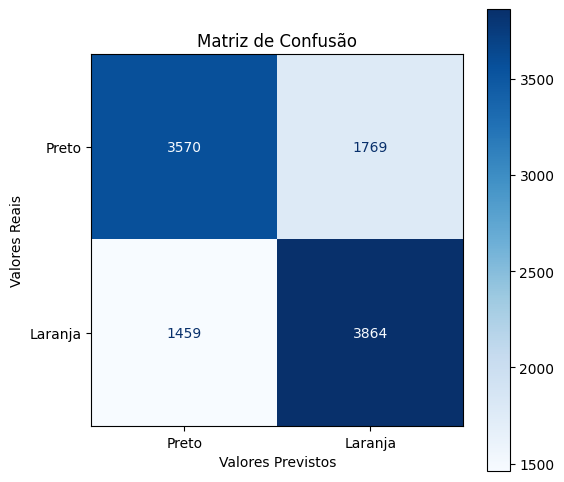

In [103]:
cm = metrics.confusion_matrix(y_test, predict_resultado)
VN, FP, FN, VP = cm.ravel()

# 1º gráfico: Matriz de confusão
plt.figure(figsize=(6, 6))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Preto", "Laranja"])
disp.plot(cmap=plt.cm.Blues, ax=plt.gca())
plt.xlabel('Valores Previstos')
plt.ylabel('Valores Reais')
plt.title('Matriz de Confusão')
plt.show()

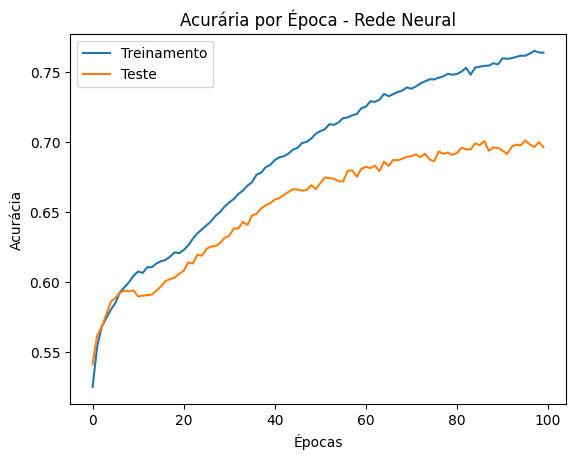

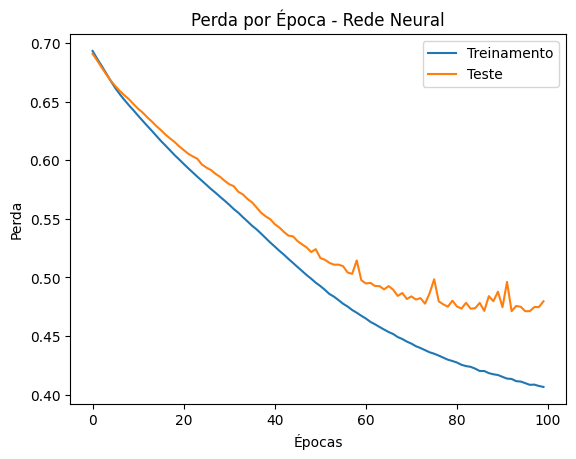

In [104]:
# Plotando a acurácia
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurária por Época - Rede Neural')
plt.legend()
plt.show()
# Plotando a função de perda
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Teste')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Perda por Época - Rede Neural')
plt.legend()
plt.show()

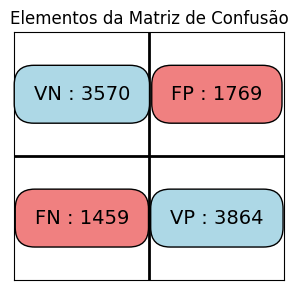

In [105]:
# 2º gráfico: Apresentação de VP, VN, FP, FN em formato de quadrantes
fig, ax = plt.subplots(figsize=(3, 3))
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.text(0.5, 1.5, f'VN : {VN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 1.5, f'FP : {FP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(0.5, 0.5, f'FN : {FN}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightcoral', edgecolor='black', boxstyle='round,pad=1'))
ax.text(1.5, 0.5, f'VP : {VP}', fontsize=14, ha='center', va='center', bbox=dict(facecolor='lightblue', edgecolor='black', boxstyle='round,pad=1'))
ax.plot([1, 1], [0, 2], color='black', lw=2)
ax.plot([0, 2], [1, 1], color='black', lw=2)
ax.set_xticks([])
ax.set_yticks([])
plt.title('Elementos da Matriz de Confusão')
plt.tight_layout()
plt.show()